In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/1101madan/Clustering/main/EastWestAirlines.csv')
data_raw.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


> The raw dataset has No Null Values; all numerical data.


In [4]:
duplicated_rows =  data_raw.duplicated().sum()
print('total Duplicated rows : ',duplicated_rows)

total Duplicated rows :  0


In [5]:
# Dropping ID Column

data_raw_1 = data_raw.drop(columns='ID#',axis=1)

In [6]:
data_raw_1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Axes: xlabel='Award?', ylabel='count'>

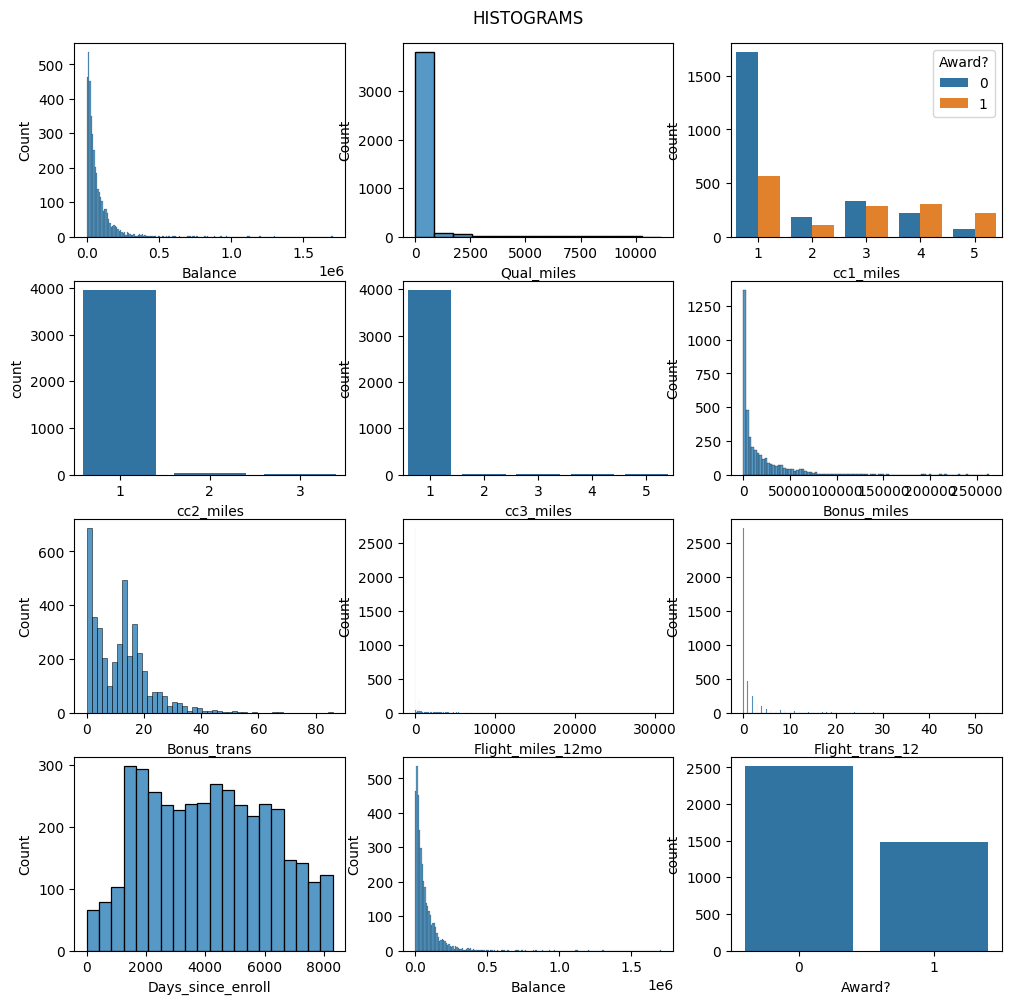

In [7]:
# Vizualizing the data

fig,axs = plt.subplots(4,3,figsize = (10,10))
plt.suptitle('HISTOGRAMS')
plt.tight_layout()
sns.histplot(x='Balance',data=data_raw_1,ax=axs[0,0],)
sns.histplot(x='Qual_miles',data=data_raw_1,ax=axs[0,1])
sns.countplot(x='cc1_miles', data=data_raw_1,hue='Award?', ax=axs[0,2])
sns.countplot(x='cc2_miles',data=data_raw_1,ax=axs[1,0])
sns.countplot(x='cc3_miles',data=data_raw_1,ax=axs[1,1])
sns.histplot(x='Bonus_miles',data=data_raw_1,ax=axs[1,2])
sns.histplot(x='Bonus_trans',data=data_raw_1,ax=axs[2,0])
sns.histplot(x='Flight_miles_12mo',data=data_raw_1,ax=axs[2,1])
sns.histplot(x='Flight_trans_12',data=data_raw_1,ax=axs[2,2])
sns.histplot(x='Days_since_enroll',data=data_raw_1,ax=axs[3,0])
sns.histplot(x='Balance',data=data_raw_1,ax=axs[3,1])
sns.countplot(x='Award?',data=data_raw_1,ax=axs[3,2])


<Axes: xlabel='Award?', ylabel='count'>

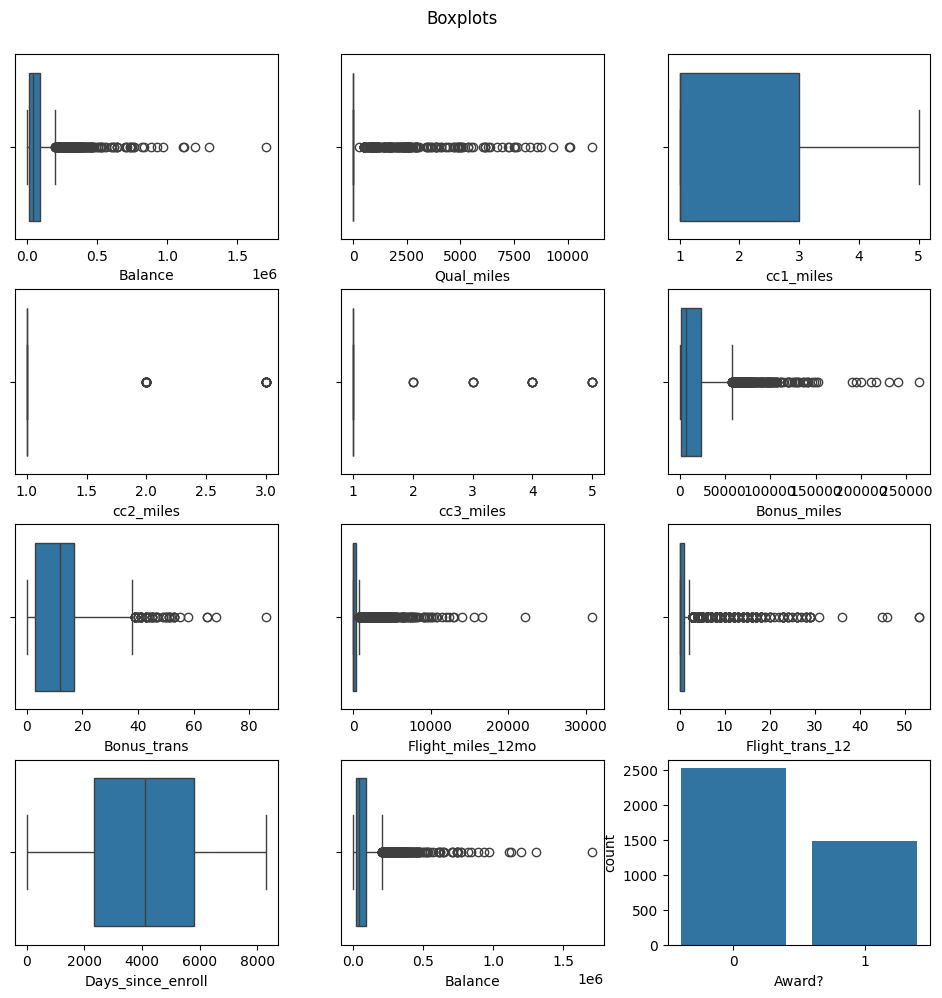

In [8]:
# Vizualizing the data

fig,axs = plt.subplots(4,3,figsize = (10,10))
plt.suptitle('Boxplots')
plt.tight_layout(pad=1.5)
sns.boxplot(x='Balance',data=data_raw_1,ax=axs[0,0])
sns.boxplot(x='Qual_miles',data=data_raw_1,ax=axs[0,1])
sns.boxplot(x='cc1_miles',data=data_raw_1,ax=axs[0,2])
sns.boxplot(x='cc2_miles',data=data_raw_1,ax=axs[1,0])
sns.boxplot(x='cc3_miles',data=data_raw_1,ax=axs[1,1])
sns.boxplot(x='Bonus_miles',data=data_raw_1,ax=axs[1,2])
sns.boxplot(x='Bonus_trans',data=data_raw_1,ax=axs[2,0])
sns.boxplot(x='Flight_miles_12mo',data=data_raw_1,ax=axs[2,1])
sns.boxplot(x='Flight_trans_12',data=data_raw_1,ax=axs[2,2])
sns.boxplot(x='Days_since_enroll',data=data_raw_1,ax=axs[3,0])
sns.boxplot(x='Balance',data=data_raw_1,ax=axs[3,1])
sns.countplot(x='Award?',data=data_raw_1,ax=axs[3,2])


<Axes: xlabel='Award?', ylabel='Balance'>

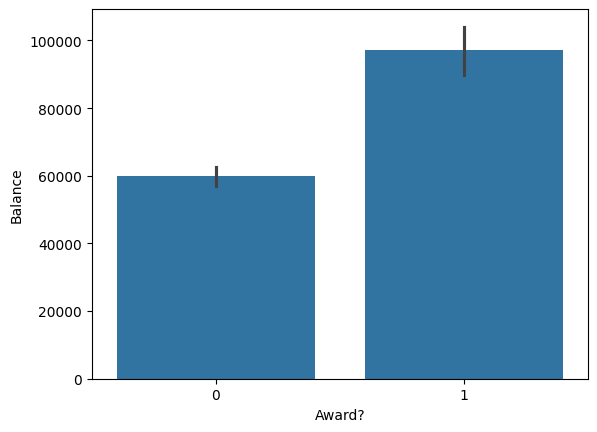

In [ ]:
sns.barplot(data=data_raw_1,x='Award?',y='Balance')

<Axes: xlabel='Days_since_enroll', ylabel='Balance'>

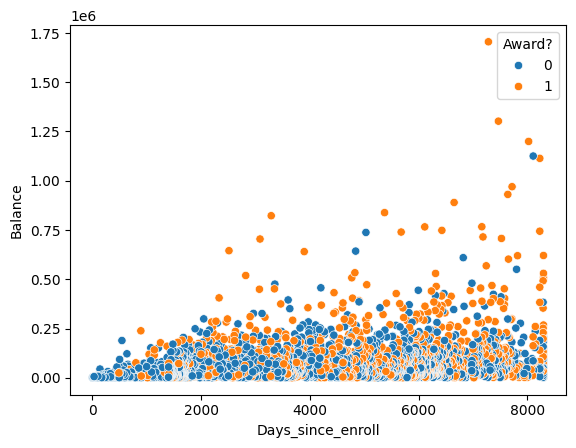

In [9]:
sns.scatterplot(data=data_raw_1, x='Days_since_enroll', y='Balance', hue='Award?')



<Axes: title={'center': 'CORRELATION MATRIX'}>

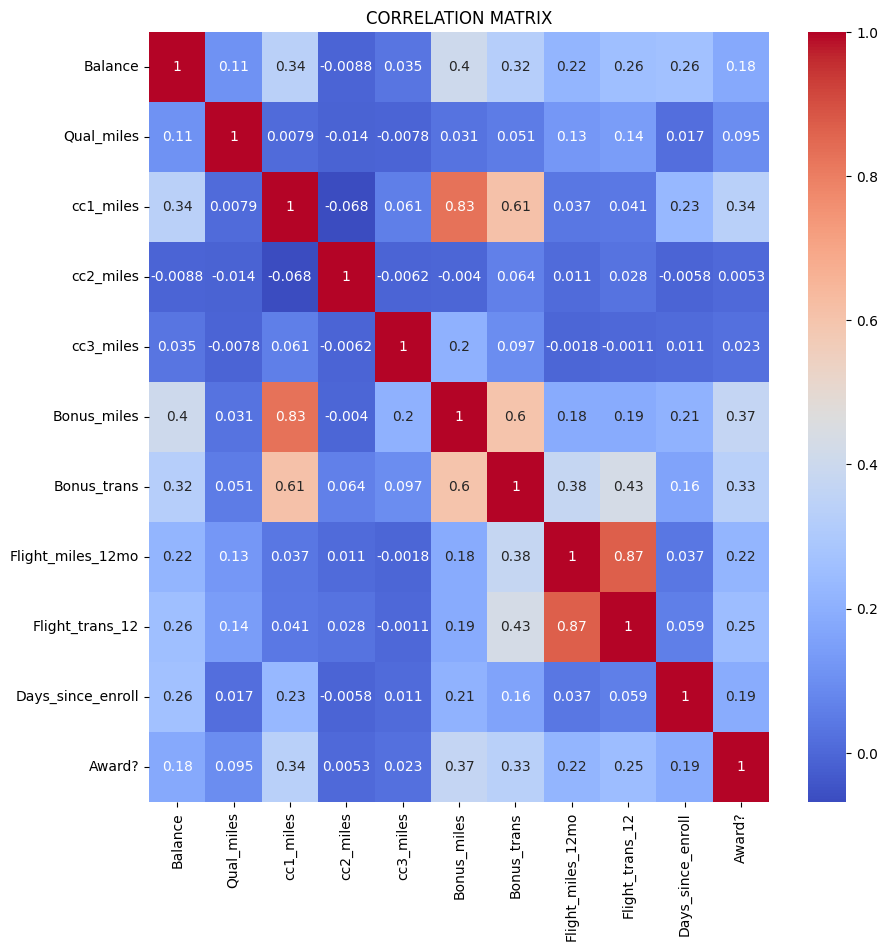

In [10]:
plt.figure(figsize=(10,10))
plt.title('CORRELATION MATRIX')
sns.heatmap(data_raw_1.corr(),annot=True,cmap='coolwarm')


From the heatmap we can see that very few are negatively correlated.
Also Most of the varibles have very weak or No Correlation with each other.

Some IMPORTANT Correlation from the data are:


* Flight_trans_12 and 	Flight_miles_12mo - Highest Positive correlation Correlation(0.87)
* Bonus_trans And cc1_miles - Positive Correlation 0.61
* Days_since_enroll	and cc2_miles - lowest negative Correlation - -0.0058
* cc1_miles and	Bonus_miles	has a correlation of 0.83

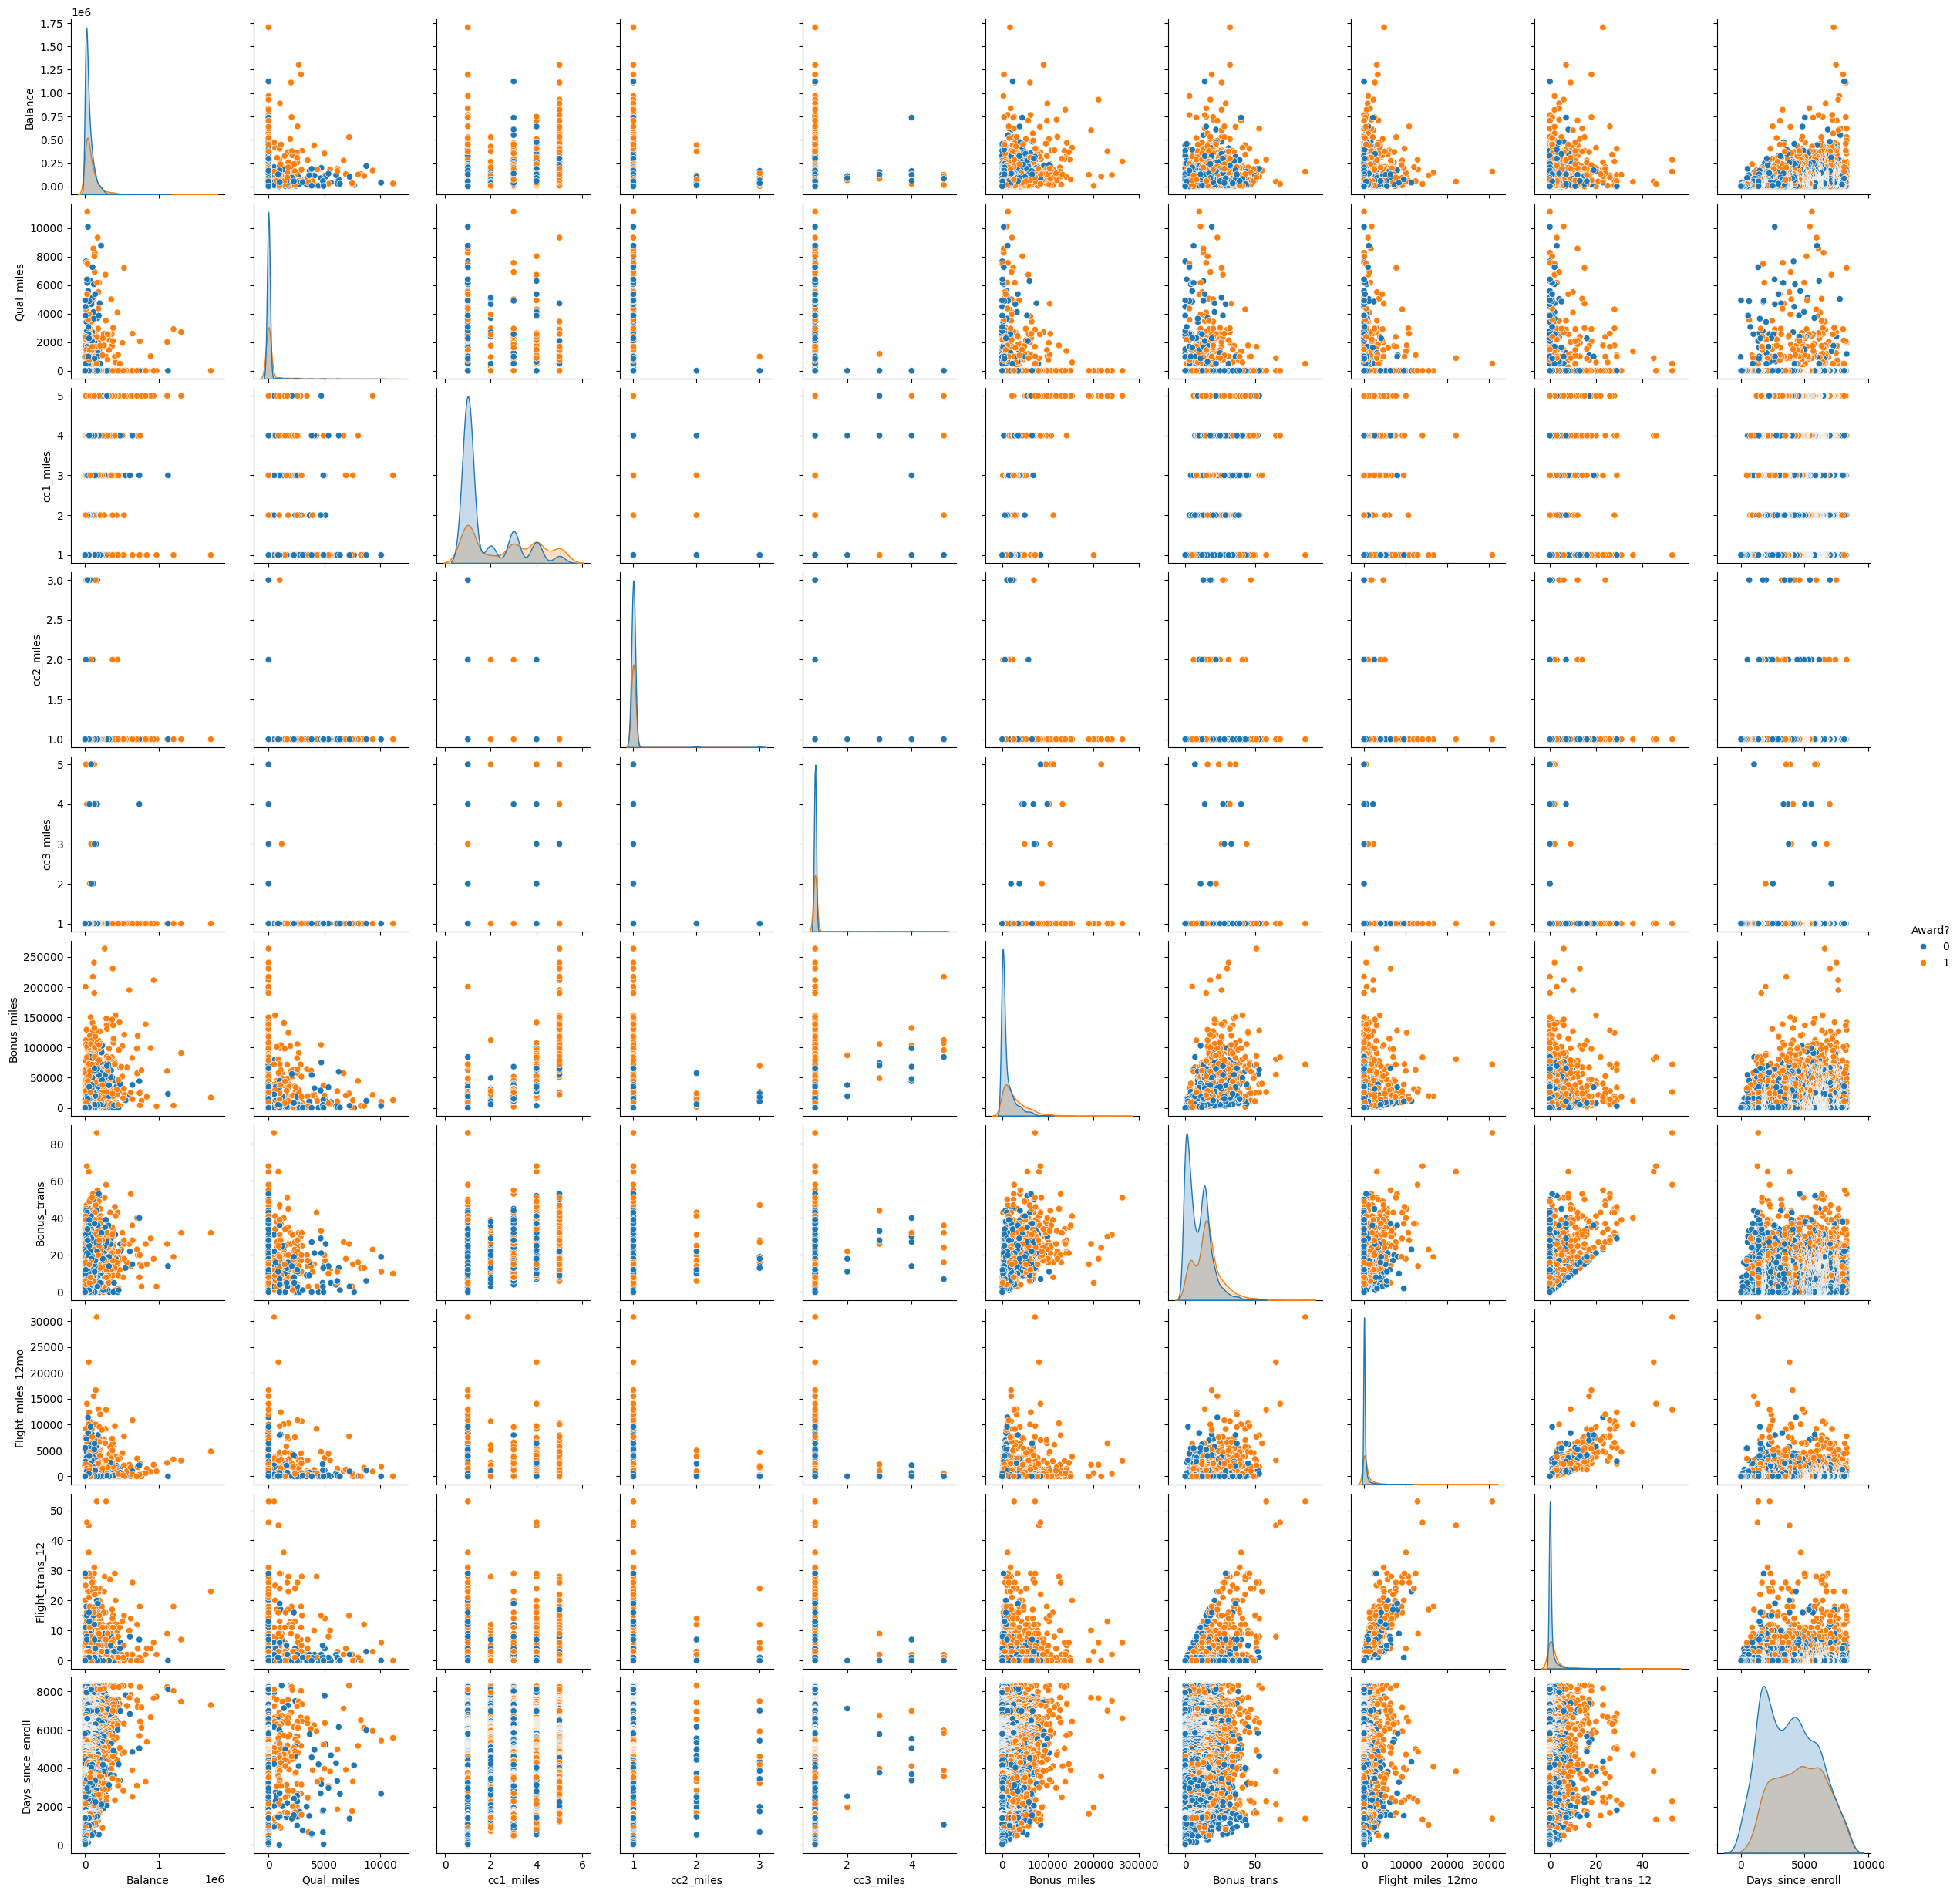

In [ ]:
sns.pairplot(data_raw_1,hue='Award?')

In [11]:
data_raw_1.shape

(3999, 11)

In [12]:
# Dropping Award? Column as 

data_raw_1 = data_raw.drop(columns=['ID#','Award?'],axis=1)

In [13]:

from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(data_raw_1)
std_data.shape

(3999, 10)

In [14]:
data_raw_1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [15]:
std_data_df = pd.DataFrame(std_data,columns=data_raw_1.columns)
std_data_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [16]:
import scipy.cluster.hierarchy as hier_cluster
from sklearn.cluster import AgglomerativeClustering


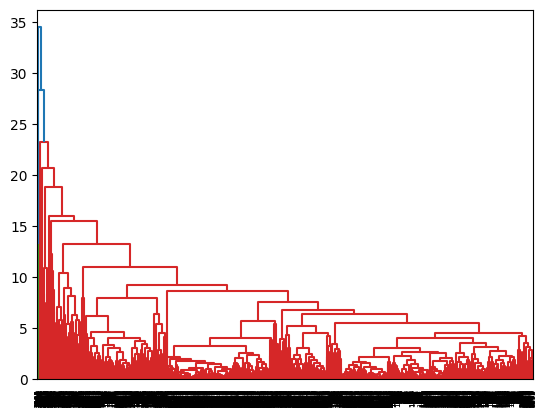

In [17]:
dendogram = hier_cluster.dendrogram(hier_cluster.linkage(std_data_df,method='complete'))

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler().fit_transform(data_raw_1)

In [19]:
scaled_data_df = pd.DataFrame(scaled_data,columns=data_raw_1.columns)
scaled_data_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


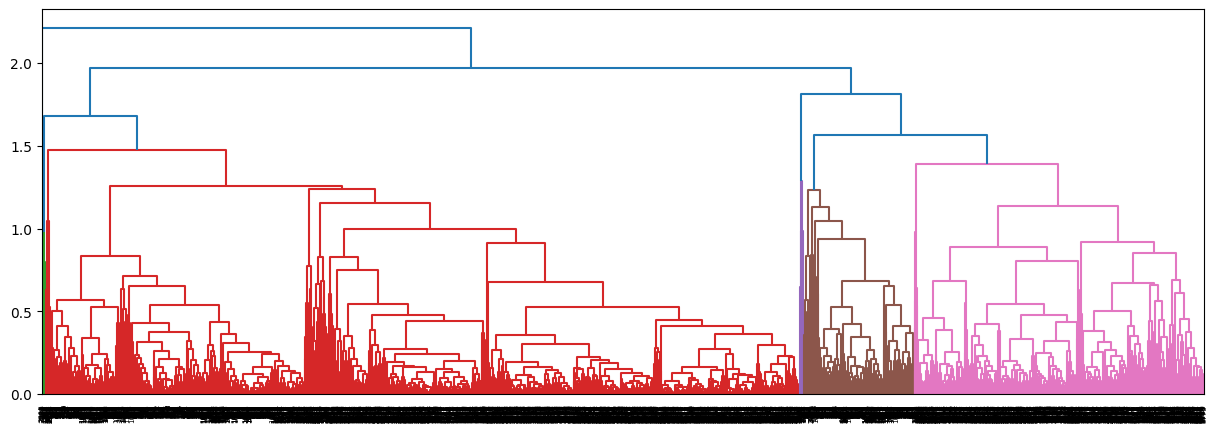

In [20]:
plt.figure(figsize=(15,5))
dendogram2 = hier_cluster.dendrogram(hier_cluster.linkage(scaled_data_df,method='complete'))

* As we can See the Scaled Data has better Clusters than Normalized data.
* The Scaled Data has 5 Clusters.
* 

In [22]:
agg_cluster = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='complete')

In [24]:
hc_final = agg_cluster.fit_predict(scaled_data_df)
clusters = pd.DataFrame(hc_final,columns=['Clusters'])

In [25]:
clusters.value_counts()

Clusters
2           2596
0           1376
1             14
4              9
3              4
Name: count, dtype: int64

In [26]:
clusters.shape

(3999, 1)

In [27]:
clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
...,...
3994,2
3995,2
3996,0
3997,2


In [30]:
scaled_data_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [28]:
clustered_df = pd.concat([scaled_data_df,clusters],axis=1)

In [29]:
clustered_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,2
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,2
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,2
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,2
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,2
